In [77]:
# Importo las librerias a utilizar
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import plotly.express as px  # Viene instalado en JupyterLab
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [78]:
# Cargo el dataset y lo represento en un eje bidimensional
data__route = 'data/basic2.csv'
dataset = pd.read_csv(data__route)

# Primeros 5 ejemplos
dataset.head(5)

,x,y,color
0,394.778257,162.929596,3
1,113.187672,136.498196,0
2,400.937252,194.179802,3
3,194.372621,208.106101,2
4,290.609779,135.674950,1


In [79]:
# Antes de continuar con la visualizacion, normalizo los datos
scaler = MinMaxScaler()

dataset_norm = scaler.fit_transform(dataset[['x', 'y']])
dataset_norm

array([[0.71525738, 0.34467779],
       [0.1720989 , 0.28267315],
       [0.72713743, 0.41798672],
       ...,
       [0.9321016 , 0.89718436],
       [0.74209958, 0.81957334],
       [0.96233916, 0.49990469]])

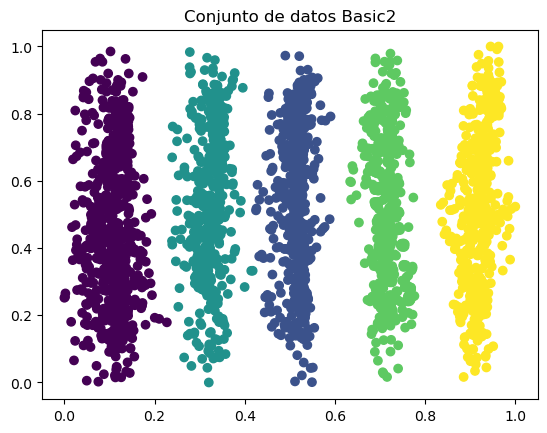

In [80]:
# Grafico los puntos del dataset
plt.figure()
plt.scatter(dataset_norm[:, 0], dataset_norm[:, 1], c = dataset["color"])
plt.title("Conjunto de datos Basic2")
plt.show()

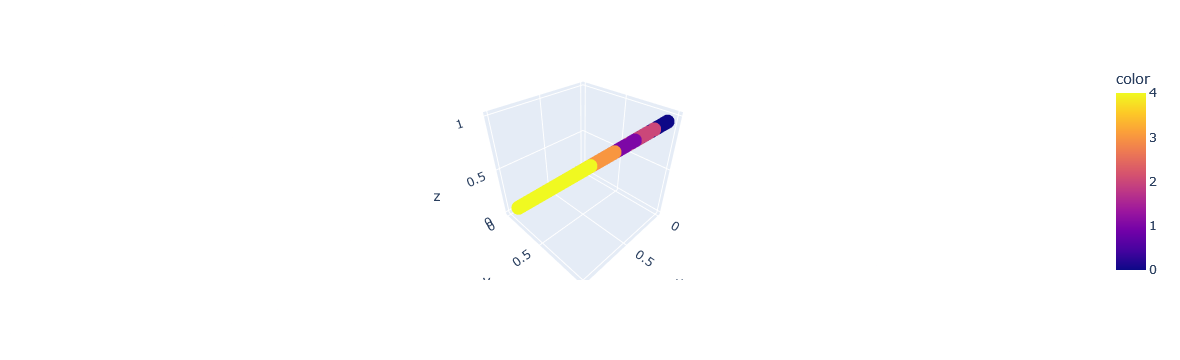

In [81]:
# Represento el conjunto de datos en un grafico de dispersion 3D
fig = px.scatter_3d(dataset_norm, dataset_norm[:, 0], dataset_norm[:, 1], dataset_norm[:, 1], color = dataset['color'])
fig.show()

In [164]:
# Desarrollo un modelo KMeans
from sklearn.cluster import DBSCAN

# Designo 5 clusters al modelo
n_cluster = 5
model = DBSCAN(eps= .035)

# Entreno el modelo con el dataset completo
model.fit_predict(dataset_norm)

array([0, 1, 0, ..., 4, 0, 4], dtype=int64)

In [165]:
# Obtengo las etiquetas de cada punto
labels = model.labels_

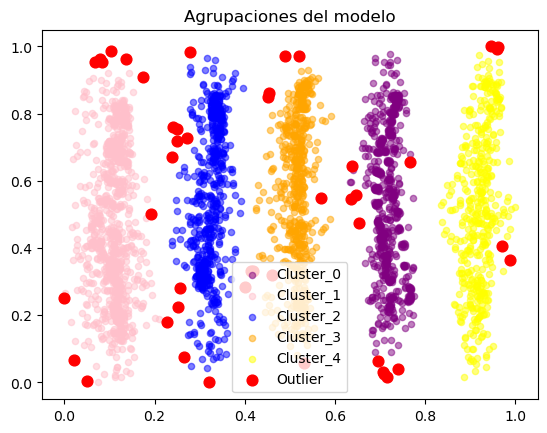

In [166]:
# Visualizo las agrupaciones del modelo
plt.figure()

n_clusters = list(range(n_cluster))
colors = ['purple', 'pink', 'blue', 'orange', 'yellow']
for _ in n_clusters:
    plt.scatter(dataset_norm[labels == _][:, 0], dataset_norm[labels == _][:, 1], c = colors[_], label = f"Cluster_{_}", s = 20, alpha = 0.5)
    
# Represento aquellos puntos que no hayan sido clasificados por el modelo
plt.scatter(dataset_norm[labels == -1][:, 0], dataset_norm[labels == -1][:, 1], c = "red", s = 60, label = "Outlier")
    
plt.title("Agrupaciones del modelo")
plt.legend()
plt.show()

In [167]:
print("Puntos clasificados correctamnete ==>", len(dataset_norm[labels != -1]))
print("Puntos sin clasificar (OUTLIERS) ==>", len(dataset_norm[labels == -1]))

Puntos clasificados correctamnete ==> 3146
Puntos sin clasificar (OUTLIERS) ==> 46


In [176]:
dataset_norm[labels is not -1]

array([[[0.71525738, 0.34467779],
        [0.1720989 , 0.28267315],
        [0.72713743, 0.41798672],
        ...,
        [0.9321016 , 0.89718436],
        [0.74209958, 0.81957334],
        [0.96233916, 0.49990469]]])

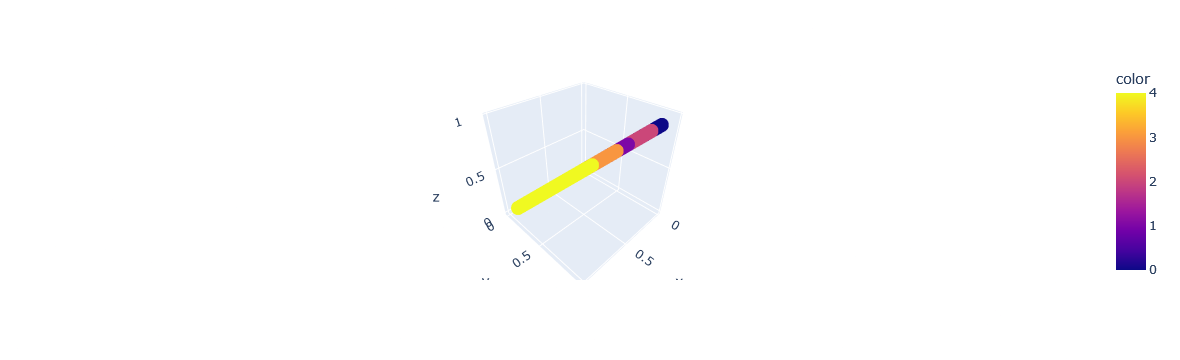

In [187]:
# Visualizo el resultado en un mapa 3D
fig = px.scatter_3d(dataset_norm, dataset_norm[labels != -1][:, 0], dataset_norm[labels != -1][:, 1], dataset_norm[labels != -1][:, 1], color = dataset['color'][labels != -1])
fig.show()

He probado diferentes algoritmos de clustering, y a pesar de haber dejado fuera algunos puntos (es comun en el caso de DBSCAN), es el algoritmo que mejor ha agrupado los diferentes puntos.